# Bank Customer Churn Prediction
  
The customer churn, also known as customer attrition, refers to the phenomenon whereby a customer leaves a company. Some studies confirmed that acquiring new customers can cost five times more than satisfying and retaining existing customers. As a matter of fact, there are a lot of benefits that encourage the tracking of the customer churn rate, for example:  

- Marketing costs to acquire new customers are high. Therefore, it is important to retain customers so that the initial investment is not wasted;  
- It has a direct impact on the ability to expand the company;  
  
In this project our goal is to predict the probability of a customer is likely to churn using machine learning techniques.
  

In [1]:
#import neccessary libraries
import numpy as np
import pandas as pd
import sklearn as sl
import sklearn.preprocessing as preprocessing
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.set_option('max_colwidth',100)

from __future__ import print_function
import itertools
import warnings
warnings.filterwarnings("ignore")
import os
import io

In [2]:
import numpy as np
import pandas as pd

training_data = pd.read_csv('bank.data.csv')
training_data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.780,2,1,0,149756.710,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.000,2,1,1,10062.800,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.740,4,1,0,119346.880,1
8,9,15792365,He,501,France,Male,44,4,142051.070,2,0,1,74940.500,0
9,10,15592389,H?,684,France,Male,27,2,134603.880,1,1,1,71725.730,0


In [3]:
print ("Num of rows: " + str(training_data.shape[0])) # row count
print ("Num of columns: " + str(training_data.shape[1])) # col count

training_data.shape

Num of rows: 10000
Num of columns: 14


(10000, 14)

In [106]:
# Checking for unique value in the data attributes
training_data.nunique()

creditscore           460
age                    68
tenure                 11
balance              6382
numofproducts           4
hascrcard               2
isactivemember          2
estimatedsalary      9999
exited                  2
geography_France        2
geography_Germany       2
geography_Spain         2
gender_Female           2
gender_Male             2
dtype: int64

In [4]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
# Convert all columns heading in lowercase 
clean_column_name = []
columns = training_data.columns
for i in range(len(columns)):
    clean_column_name.append(columns[i].lower())
training_data.columns = clean_column_name

In [6]:
# Drop the irrelevant columns  as shown above
training_data = training_data.drop(["rownumber", "customerid", "surname"], axis = 1)

In [7]:
#Separating churn and non churn customers
churn     = training_data[training_data["exited"] == 1]
not_churn = training_data[training_data["exited"] == 0]

In [8]:
target_col = ["exited"]
cat_cols   = training_data.nunique()[training_data.nunique() < 6].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
num_cols   = [x for x in training_data.columns if x not in cat_cols + target_col]

## Exploratory Data Analysis (EDA)

In [9]:
# the first 5 lines of the dataset
training_data.head()

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [10]:
# View the dimension of the dataset
training_data.shape

(10000, 11)

In [11]:
# Checking for unique value in the data attributes
training_data.nunique()

creditscore         460
geography             3
gender                2
age                  70
tenure               11
balance            6382
numofproducts         4
hascrcard             2
isactivemember        2
estimatedsalary    9999
exited                2
dtype: int64

In [104]:
# identify which attribute has a missing or null value.
training_data.isnull().sum()

creditscore          0
age                  0
tenure               0
balance              0
numofproducts        0
hascrcard            0
isactivemember       0
estimatedsalary      0
exited               0
geography_France     0
geography_Germany    0
geography_Spain      0
gender_Female        0
gender_Male          0
dtype: int64

__As I can see the rownumber attribute is just like a counter of records, the customerid attribute is a unique identifier for a given customer and the surname attribute enter also the profiling a customer.   
So I am going to remove them from our dataset they don't give useful information the analysis.__

In [12]:
# Drop the irrelevant columns  as shown above
#training_data = training_data.drop(["rownumber", "customerid", "surname"], axis = 1)

In [13]:
# Describe the all statistical properties of the training dataset
training_data[training_data.columns[:10]].describe()

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary
count,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000
mean,650.529,38.922,5.013,76485.889,1.530,0.706,0.515,100090.240
std,96.653,10.488,2.892,62397.405,0.582,0.456,0.500,57510.493
min,350.000,18.000,0.000,0.000,1.000,0.000,0.000,11.580
25%,584.000,32.000,3.000,0.000,1.000,0.000,0.000,51002.110
50%,652.000,37.000,5.000,97198.540,1.000,1.000,1.000,100193.915
75%,718.000,44.000,7.000,127644.240,2.000,1.000,1.000,149388.247
max,850.000,92.000,10.000,250898.090,4.000,1.000,1.000,199992.480


In [14]:
# Median
training_data[training_data.columns[:10]].median()

creditscore          652.000
age                   37.000
tenure                 5.000
balance            97198.540
numofproducts          1.000
hascrcard              1.000
isactivemember         1.000
estimatedsalary   100193.915
dtype: float64

In [15]:
# Mean
training_data[training_data.columns[:10]].mean()

creditscore          650.529
age                   38.922
tenure                 5.013
balance            76485.889
numofproducts          1.530
hascrcard              0.706
isactivemember         0.515
estimatedsalary   100090.240
dtype: float64

__Customer churn in the data__

In [16]:
# Percentage per category for the target column.
percentage_labels = training_data['exited'].value_counts(normalize = True) * 100
percentage_labels

0   79.630
1   20.370
Name: exited, dtype: float64

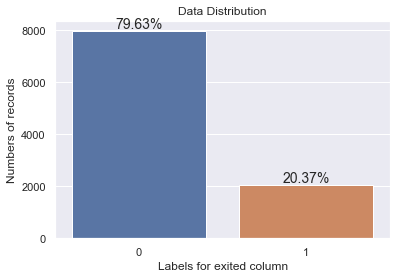

In [17]:
# Graphical representation of the target label percentage.
total_len = len(training_data['exited'])
sns.set()
sns.countplot(training_data.exited).set_title('Data Distribution')
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 2,
            '{:.2f}%'.format(100 * (height/total_len)),
            fontsize=14, ha='center', va='bottom')
sns.set(font_scale=1.5)
ax.set_xlabel("Labels for exited column")
ax.set_ylabel("Numbers of records")
plt.show()

From this chart, one can see that there are many records with the target label  0 and fewer records with the target label  1.   
One can see that the data records with a  0 label are about  79.63%, whereas  20.37% of the data records are labeled  1.   
I will use all of these facts in the upcoming sections. For now, I can consider our outcome variable as imbalanced.

__Distribution of the categorical variables__

In [18]:
!pip install plotly

import plotly.offline as py #visualization
py.init_notebook_mode(connected=True) #visualization
import plotly.graph_objs as go #visualization
import plotly.tools as tls #visualization
import plotly.figure_factory as ff #visualization

The output above shows us that the among the churned customers those who are are geographycally located in Germay have a high rate of churn with  40%
 , followed by France with  39.8%
  and Spain with  20.3%
 . For non chun customers France is leading with  52.8%
 , Spain with  25.9%
  and Germany with  21.3%
 .

In [19]:
#function  for pie plot for customer attrition types
def plot_pie(column) :
    
    trace1 = go.Pie(values  = churn[column].value_counts().values.tolist(),
                    labels  = churn[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [0,.48]),
                    name    = "Churn Customers",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    hole    = .6
                   )
    trace2 = go.Pie(values  = not_churn[column].value_counts().values.tolist(),
                    labels  = not_churn[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    domain  = dict(x = [.52,1]),
                    hole    = .6,
                    name    = "Non churn customers" 
                   )


    layout = go.Layout(dict(title = column + " distribution in customer attrition ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            annotations = [dict(text = "churn customers",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .15, y = .5),
                                           dict(text = "Non churn customers",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .88,y = .5
                                               )
                                          ]
                           )
                      )
    data = [trace1,trace2]
    fig  = go.Figure(data = data,layout = layout)
    py.iplot(fig)
#for all categorical columns plot pie
#for i in cat_cols :
    #plot_pie(i)

In [20]:
# Calling the function for plotting the pie plot for geography column
plot_pie(cat_cols[0])

The output above shows us that the among the churned customers those who are are geographycally located in Germay have a high rate of churn with  40% , followed by France with  39.8%  and Spain with  20.3% . For non chun customers France is leading with  52.8% , Spain with  25.9%  and Germany with  21.3% .

In [21]:
# Calling the function for plotting the pie plot for gender column
plot_pie(cat_cols[1])

The output above shows that for the churn customers female have  55.9% , whereas male with  44.1% . For the case of non churn customers  57.3%  are male and  42.7%  are female.

In [22]:
# Calling the function for plotting the pie plot for numofproducts column
plot_pie(cat_cols[2])

The graph above shows that among the churn customers, the rate of those who use one product is very high with  69.2% , followed by those who use two products with  17.1% , three products with  10.8% , and four products with  2.95% . For non churn customers, customers with two products are  53.3% , one product are  46.2% , and three products are  0.58% .

In [23]:
# Calling the function for plotting the pie plot for gender column
plot_pie(cat_cols[3])

The output above shows us that for the churn customers those who possess a card are  69.9% , whereas those don't possess are  30.1% . For the case of non churn customers  70.7%  possess a card and  29.3%  don't possess a card

In [24]:
# Calling the function for plotting the pie plot for geography column
plot_pie(cat_cols[4])

The output above shows us that the among the churned customers those who are not active members have a high rate of churn with  63.9% , and active members with  36.1% . For non chun customers active members are leading with  55.5% , and non active members with  44.5% 

### __Distribution of the continuous variables__

In [25]:
#function  for histogram for customer churn types
def histogram(column) :
    trace1 = go.Histogram(x  = churn[column],
                          histnorm= "percent",
                          name = "Churn Customers",
                          marker = dict(line = dict(width = .5,
                                                    color = "black"
                                                    )
                                        ),
                         opacity = .9 
                         ) 
    
    trace2 = go.Histogram(x  = not_churn[column],
                          histnorm = "percent",
                          name = "Non churn customers",
                          marker = dict(line = dict(width = .5,
                                              color = "black"
                                             )
                                 ),
                          opacity = .9
                         )
    
    data = [trace1,trace2]
    layout = go.Layout(dict(title =column + " distribution in customer attrition ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = column,
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                            yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = "percent",
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                           )
                      )
    fig  = go.Figure(data=data,layout=layout)
    
    py.iplot(fig)
    
#  For more information on the different plot just pass the mousse hover the graph.

In [26]:
# Calling the function for plotting the histogram for creditscore column 
histogram(num_cols[0])

In [27]:
# Calling the function for plotting the histogram for creditscore column 
# Pass the mouse hover the graph for more information. 
histogram(num_cols[1])

The graph above shows us that the customers with age of 46 are the most churned.

In [28]:
# Calling the function for plotting the histogram for tenure column 
histogram(num_cols[2])

Pass the mouse hover the graph for more information. It shows us that the customers who have been with the bank just for one moth are the most churned.

In [29]:
# Calling the function for plotting the histogram for balance column 
histogram(num_cols[3])

In [30]:
# Calling the function for plotting the histogram for estimatedsalary  column 
histogram(num_cols[4])

### __Finding missing values__  
In order to find the missing values in the dataset, I need to check each and every data attribute.   
First, I will try to identify which attribute has a missing or null value.

In [31]:
training_data.isnull().sum()

creditscore        0
geography          0
gender             0
age                0
tenure             0
balance            0
numofproducts      0
hascrcard          0
isactivemember     0
estimatedsalary    0
exited             0
dtype: int64

__Correlation__  
The term correlation refers to a mutual relationship or association between quantities.   
So, here, I will find out what kind of association is present among the different data attributes.

In [32]:
# Get the correlation matrix of the training dataset
training_data[training_data.columns].corr()

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
creditscore,1.000,-0.004,0.001,0.006,0.012,-0.005,0.026,-0.001,-0.027
age,-0.004,1.000,-0.010,0.028,-0.031,-0.012,0.085,-0.007,0.285
tenure,0.001,-0.010,1.000,-0.012,0.013,0.023,-0.028,0.008,-0.014
balance,0.006,0.028,-0.012,1.000,-0.304,-0.015,-0.010,0.013,0.119
numofproducts,0.012,-0.031,0.013,-0.304,1.000,0.003,0.010,0.014,-0.048
hascrcard,-0.005,-0.012,0.023,-0.015,0.003,1.000,-0.012,-0.010,-0.007
isactivemember,0.026,0.085,-0.028,-0.010,0.010,-0.012,1.000,-0.011,-0.156
estimatedsalary,-0.001,-0.007,0.008,0.013,0.014,-0.010,-0.011,1.000,0.012
exited,-0.027,0.285,-0.014,0.119,-0.048,-0.007,-0.156,0.012,1.000


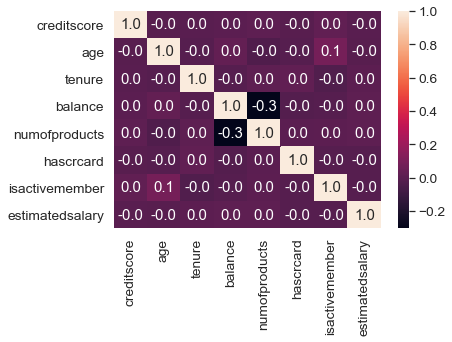

In [33]:
# Visualization of the correlation matrix using heatmap plot
sns.set()
sns.set(font_scale = 1.25)
sns.heatmap(training_data[training_data.columns[:10]].corr(), annot = True,fmt = ".1f")
plt.show()

__The following facts can be derived from the graph:__

-Cells with 1.0 values are highly correlated with each other;  
-Each attribute has a very high correlation with itself, so all the diagonal values are 1.0;  
-Balance attribute is negatively correlated with numberofproducts attribute. It means one attribute increases as the other decreases, and vice versa.    
  
Before moving ahead, I need to check whether these attributes contain any outliers or insignificant values.   
If they do, I need to handle these outliers, so our next section is about detecting outliers from our training dataset.

### __Detecting and Handling Outliers__  
In this part, I will try to detect outliers and how to handle them.

In [34]:
# Function which plot box plot for detecting outliers
trace = []
def gen_boxplot(df):
    for feature in df:
        trace.append(
            go.Box(
                name = feature,
                y = df[feature]
            )
        )

new_df = training_data[num_cols[:1]]
gen_boxplot(new_df)
data = trace
py.iplot(data)

# The box plots above don't show us any value 
# that are faraway from the min value and also from the max value, so there is outliers detected.

In [35]:
# Function which plot box plot for detecting outliers
trace = []
def gen_boxplot(df):
    for feature in df:
        trace.append(
            go.Box(
                name = feature,
                y = df[feature]
            )
        )
new_df = training_data[num_cols[1:3]]
gen_boxplot(new_df)
data = trace
py.iplot(data)

# The graph tells us that for age there is few outliers. 
# As we can see the two extrem values for the age box plot.

In [36]:
# Handling age column outliers
ageNew = []
for val in training_data.age:
    if val <= 85:
        ageNew.append(val)
    else:
        ageNew.append(training_data.age.median())
        
training_data.age = ageNew

## Data preparation

In [37]:
# One-Hot encoding our categorical attributes
list_cat = ['geography', 'gender']
training_data = pd.get_dummies(training_data, columns = list_cat, prefix = list_cat)

In [38]:
# Print the first five rows
training_data.head()

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,geography_France,geography_Germany,geography_Spain,gender_Female,gender_Male
0,619,42.000,2,0.000,1,1,1,101348.880,1,1,0,0,1,0
1,608,41.000,1,83807.860,1,0,1,112542.580,0,0,0,1,1,0
2,502,42.000,8,159660.800,3,1,0,113931.570,1,1,0,0,1,0
3,699,39.000,1,0.000,2,0,0,93826.630,0,1,0,0,1,0
4,850,43.000,2,125510.820,1,1,1,79084.100,0,0,0,1,1,0


## Feature engineering for the baseline model
In this section, you will learn how to select features that are important in order to develop the predictive model.   
So right now, just to begin with,I won't focus much on deriving new features at this stage because first, I need to know which input variables / columns / data attributes / features give us at least baseline accuracy.   
So, in this first iteration, our focus is on the selection of features from the available training dataset.
  
__Finding out Feature importance__  
I need to know which the important features are. In order to find that out, I am going to train the model using the Random Forest classifier. After that, I will have a rough idea about the important features for us.

In [39]:
# Import the Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

In [40]:
X = training_data.drop('exited', axis=1)
y = training_data.exited
features_label = X.columns
forest = RandomForestClassifier (n_estimators = 10000, random_state = 0, n_jobs = -1)
forest.fit(X, y)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for i in range(X.shape[1]):
    print ("%2d) %-*s %f" % (i + 1, 30, features_label[i], importances[indices[i]]))

 1) creditscore                    0.239871
 2) age                            0.146924
 3) tenure                         0.144463
 4) balance                        0.141905
 5) numofproducts                  0.128252
 6) hascrcard                      0.083890
 7) isactivemember                 0.039927
 8) estimatedsalary                0.020739
 9) geography_France               0.018099
10) geography_Germany              0.009935
11) geography_Spain                0.008867
12) gender_Female                  0.008583
13) gender_Male                    0.008545


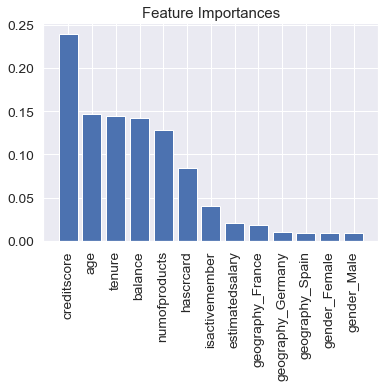

In [41]:
# Visualization of the Feature importances
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align = "center")
plt.xticks(range(X.shape[1]), features_label, rotation = 90)
plt.show()

The graph above shows the features with the highest importance value to the lowest importance value.   
It shows the most important features are creditscore, age, tenure, balance, and so on. I will surely revisit again feature engineering in the upcoming sections.



## Selecting Machine Learning Algorithms  
Since I am modeling a critic problem for that I need model with high performance possible. Here, I will try a couple of different machine learning algorithms in order to get an idea about which machine learning algorithm performs better. Also, I will perform a accuracy comparison amoung them. As our problem is a classification problem, the algorithms that I am going to choose are as follows:  
  
K-Nearest Neighbor (KNN)  
Logistic Regression (LR)  
AdaBoost  
Gradient Boosting (GB)  
RandomForest (RF)  


## __Train and build baseline model__

In [42]:
# Import different models 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
# Scoring function
from sklearn.metrics import roc_auc_score, roc_curve

In [43]:
X = training_data.drop('exited', axis=1)
y = training_data.exited

__1. Import different models__

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression

In [ ]:
X = training_data.drop('exited', axis=1)
y = training_data.exited

__2. Splitting the dataset in training and test set__

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

__3. Model fitting__

In [47]:
# Initialization of the AdaBoost model
adaMod = AdaBoostClassifier(base_estimator = None, n_estimators = 200, learning_rate = 1.0)
# Fitting the model with training data 
adaMod.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=200)

In [48]:
# Initialization of the GradientBoosting model
gbMod = GradientBoostingClassifier(loss = 'deviance', n_estimators = 200)
# Fitting the model with training data 
gbMod.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=200)

In [49]:
# Initialization of the Random Forest model
rfMod = RandomForestClassifier(n_estimators=10, criterion='gini')
# Fitting the model with training data 
rfMod.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

## Testing the baseline model  
Here, I will implement the code, which will give us an idea about how good or how bad our trained models perform in a validation set. I am using the mean accuracy score and the AUC-ROC score. I have generated five different classifiers and, after performing testing for each of them on the validation dataset, which is  25%  of held-out dataset from the training dataset, I will find out which model works well and gives us a reasonable baseline score.

In [50]:
# Compute the model accuracy on the given test data and labels
knn_acc = knMod.score(X_test, y_test)
# Return probability estimates for the test data
test_labels = knMod.predict_proba(np.array(X_test.values))[:,1]
# Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores
knn_roc_auc = roc_auc_score(y_test, test_labels , average = 'macro', sample_weight = None)

In [51]:
# Compute the model accuracy on the given test data and labels
lr_acc = lrMod.score(X_test, y_test)
# Return probability estimates for the test data
test_labels = lrMod.predict_proba(np.array(X_test.values))[:,1]
# Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores
lr_roc_auc = roc_auc_score(y_test, test_labels , average = 'macro', sample_weight = None)

In [52]:
# Compute the model accuracy on the given test data and labels
ada_acc = adaMod.score(X_test, y_test)
# Return probability estimates for the test data
test_labels = adaMod.predict_proba(np.array(X_test.values))[:,1]
# Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores
ada_roc_auc = roc_auc_score(y_test, test_labels , average = 'macro')

In [53]:
# Compute the model accuracy on the given test data and labels
gb_acc = gbMod.score(X_test, y_test)
# Return probability estimates for the test data
test_labels = gbMod.predict_proba(np.array(X_test.values))[:,1]
# Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores
gb_roc_auc = roc_auc_score(y_test, test_labels , average = 'macro')

In [54]:
# Compute the model accuracy on the given test data and labels
rf_acc = rfMod.score(X_test, y_test)
# Return probability estimates for the test data
test_labels = rfMod.predict_proba(np.array(X_test.values))[:,1]
# Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores
rf_roc_auc = roc_auc_score(y_test, test_labels , average = 'macro')

In [55]:
models = ['KNN', 'Logistic Regression', 'AdaBoost', 'GradientBoosting', 'Random Forest']
accuracy = [knn_acc, lr_acc, ada_acc, gb_acc, rf_acc]
roc_auc = [knn_roc_auc, lr_roc_auc, ada_roc_auc, gb_roc_auc, rf_roc_auc]

d = {'accuracy': accuracy, 'roc_auc': roc_auc}
df_metrics = pd.DataFrame(d, index = models)
df_metrics

,accuracy,roc_auc
KNN,0.766,0.535
Logistic Regression,0.797,0.664
AdaBoost,0.852,0.836
GradientBoosting,0.861,0.857
Random Forest,0.851,0.814


__ROC-AUC performance for the models__

In [56]:
fpr_knn, tpr_knn, _ = roc_curve(y_test, knMod.predict_proba(np.array(X_test.values))[:,1])
fpr_lr, tpr_lr, _ = roc_curve(y_test, lrMod.predict_proba(np.array(X_test.values))[:,1])
fpr_ada, tpr_ada, _ = roc_curve(y_test, adaMod.predict_proba(np.array(X_test.values))[:,1])
fpr_gb, tpr_gb, _ = roc_curve(y_test, gbMod.predict_proba(np.array(X_test.values))[:,1])
fpr_rf, tpr_rf, _ = roc_curve(y_test, rfMod.predict_proba(np.array(X_test.values))[:,1])

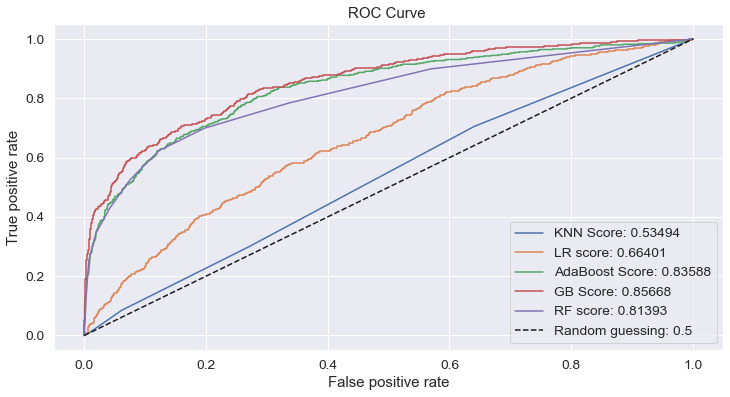

In [57]:
# Plot the roc curve
plt.figure(figsize = (12,6), linewidth= 1)
plt.plot(fpr_knn, tpr_knn, label = 'KNN Score: ' + str(round(knn_roc_auc, 5)))
plt.plot(fpr_lr, tpr_lr, label = 'LR score: ' + str(round(lr_roc_auc, 5)))
plt.plot(fpr_ada, tpr_ada, label = 'AdaBoost Score: ' + str(round(ada_roc_auc, 5)))
plt.plot(fpr_gb, tpr_gb, label = 'GB Score: ' + str(round(gb_roc_auc, 5)))
plt.plot(fpr_rf, tpr_rf, label = 'RF score: ' + str(round(rf_roc_auc, 5)))
plt.plot([0,1], [0,1], 'k--', label = 'Random guessing: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve ')
plt.legend(loc='best')
plt.show()

In the code above we used score() function of scikit-learn, which give us the mean accuracy score, whereas, the roc_auc_score() function provide us with the ROC-AUC score, which is more significant for us because the mean accuracy score considers only one threshold value, whereas the ROC-AUC score takes into consideration all possible threshold values and gives us the score.

As you can see in the code snippets given above, the GradientBoosting with  0.86  and the AdaBoost with  0.84  classifiers get a good ROC-AUC score on the validation dataset. Other classifiers, such as logistic regression, KNN, and RandomForest do not perform well on the validation set. From this stage onward, we will work with GradientBoosting and AdaBoost classifiers in order to improve their accuracy score.

In the next section, we will see what we need to do in order to increase classification accuracy since we want a model with the high accuracy possible.

# Optimization  
In this section, we will use the following techniques in order to improve the accuracy of the classifiers :

- Cross-validation  
- Hyperparameter tuning    
    
### Implementing a cross-validation based approach
  
Here, we are going to implement K-folds cross-validation. For the value of K, I am going to use  K=5 .

In [58]:
# Import the cross-validation module
from sklearn.model_selection import cross_val_score

# Function that will track the mean value and the standard deviation of the accuracy
def cvDictGen(functions, scr, X_train = X, y_train = y, cv = 5):
    cvDict = {}
    for func in functions:
        cvScore = cross_val_score(func, X_train, y_train, cv = cv, scoring = scr)
        cvDict[str(func).split('(')[0]] = [cvScore.mean(), cvScore.std()]
    
    return cvDict

In [59]:
mod = [knMod, lrMod, adaMod, gbMod, rfMod]
cvD = cvDictGen(mod, scr = 'roc_auc')
cvD

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

{'KNeighborsClassifier': [0.532941795209413, 0.015143901787688084],
 'LogisticRegression': [0.675671328489601, 0.009802018452316062],
 'AdaBoostClassifier': [0.8439111429894497, 0.0050234645868154765],
 'GradientBoostingClassifier': [0.8645319618572442, 0.0041460589254504535],
 'RandomForestClassifier': [0.8167871478230209, 0.012362313509562592]}

As we can see, in the above output, GradietBoosting and Adaboot classifier perform well. This cross-validation score helps in order to decide which model I should select and which ones I should not go with. Based on the mean value and the standard deviation value, I can conclude that our ROC-AUC score does not deviate much, so I am not suffering from the overfitting issue.
  
### Implementing hyperparameter tuning  
    
Here, I will look at how I can obtain optimal values for the parameters. So, I are going to use the RandomizedSearchCV hyperparameter tuning method. I will implement this method for the AdaBoost and GradientBossting models since they are the one having good performance.

In [60]:
# Import methods
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

__AdaBoost__

In [61]:
# Possible parameters
adaHyperParams = {'n_estimators': [10,50,100,200,420]}

In [62]:
gridSearchAda = RandomizedSearchCV(estimator = adaMod, param_distributions = adaHyperParams, n_iter = 5,
                                   scoring = 'roc_auc')
gridSearchAda.fit(X_train, y_train)


RandomizedSearchCV(estimator=AdaBoostClassifier(n_estimators=200), n_iter=5,
                   param_distributions={'n_estimators': [10, 50, 100, 200,
                                                         420]},
                   scoring='roc_auc')

In [63]:
# Display the best parameters and the score
gridSearchAda.best_params_, gridSearchAda.best_score_

({'n_estimators': 50}, 0.849715782069336)

The output above shows that the optimal value.  
  
    
__GradientBoosting__

In [85]:
# Possibles parameters
gbHyperParams = {'loss' : ['deviance', 'exponential'],
                 'n_estimators': randint(10, 500),
                 'max_depth': randint(1,10)}

In [86]:
# Initialization
gridSearchGB = RandomizedSearchCV(estimator = gbMod, param_distributions = gbHyperParams, n_iter = 10,
                                   scoring = 'roc_auc')
# Fitting the model
gridSearchGB.fit(X_train, y_train)

RandomizedSearchCV(estimator=GradientBoostingClassifier(n_estimators=200),
                   param_distributions={'loss': ['deviance', 'exponential'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f85797de340>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f864c926640>},
                   scoring='roc_auc')

In [87]:
gridSearchGB.best_params_, gridSearchGB.best_score_

({'loss': 'exponential', 'max_depth': 2, 'n_estimators': 432},
 0.8653300214700996)

The output above shows that the optimal values  
  
### Train models with help of new hyper parameter  
Here we are going to use the optimal parameter values that we got from the hyperparameter tuning.

In [88]:
# GradientBoosting with the optimal parameters
bestGbModFitted = gridSearchGB.best_estimator_.fit(X_train, y_train)


In [89]:
# AdaBoost with the optimal parameter
bestAdaModFitted = gridSearchAda.best_estimator_.fit(X_train, y_train)

In [90]:
functions = [bestGbModFitted, bestAdaModFitted]
cvDictbestpara = cvDictGen(functions, scr = 'roc_auc')
cvDictbestpara

{'GradientBoostingClassifier': [0.8612573755821776, 0.0035481527789948727],
 'AdaBoostClassifier': [0.847579949193106, 0.004081248016916273]}

In [91]:
# Getting the score GradientBoosting
test_labels = bestGbModFitted.predict_proba(np.array(X_test.values))[:,1]
roc_auc_score(y_test,test_labels , average = 'macro', sample_weight = None)

0.8599598004913273

In [92]:
# Getting the score AdaBoost
test_labels = bestAdaModFitted.predict_proba(np.array(X_test.values))[:,1]
roc_auc_score(y_test,test_labels , average = 'macro', sample_weight = None)

0.8415439589071689

We can see in the above output that there is no such an improvement. One can still ask this question : can we further improve the accuracy of the classifiers? Sure, there is always room for improvement.  
  
### Problems with the optimization approach
Up until, we did not spend a lot of time on feature engineering. So in our best possible approach, we spent time on the transformation of features engineering. We need to implement a voting mechanism in order to generate the final probability of the prediction on the actual test dataset so that we can get the best accuracy score.  
  
These are the two techniques that we need to apply:  

- Feature transformation  
- An ensemble ML model with a voting mechanism  
  
__Feature transformation (Feature engineering)__  
We will apply standard scaler/log transformation to our training dataset. The reason behind this is that we have some attributes that are very skewed and some data attributes that have values that are more spread out in nature.

In [93]:
# Import the log transformation method
from sklearn.preprocessing import FunctionTransformer, StandardScaler

In [94]:
transformer = FunctionTransformer(np.log1p)
scaler = StandardScaler()
X_train_1 = np.array(X_train)
#X_train_transform = transformer.transform(X_train_1)
X_train_transform = scaler.fit_transform(X_train_1)

In [95]:
bestGbModFitted_transformed = gridSearchGB.best_estimator_.fit(X_train_transform, y_train)
bestAdaModFitted_transformed = gridSearchAda.best_estimator_.fit(X_train_transform, y_train)

In [96]:
cvDictbestpara_transform = cvDictGen(functions = [bestGbModFitted_transformed, bestAdaModFitted_transformed],
                                     scr='roc_auc')
cvDictbestpara_transform

{'GradientBoostingClassifier': [0.8612573755821776, 0.0035481527789948727],
 'AdaBoostClassifier': [0.847579949193106, 0.004081248016916273]}

In [97]:
# For the test set
X_test_1 = np.array(X_test)
#X_test_transform = transformer.transform(X_test_1)
X_test_transform = scaler.fit_transform(X_test_1)

In [98]:
test_labels=bestGbModFitted_transformed.predict_proba(np.array(X_test_transform))[:,1]
roc_auc_score(y_test,test_labels , average = 'macro', sample_weight = None)

0.8586257723516713

__Voting-based ensemble model__  
In this section, we will use a voting-based ensemble classifier. So, we implement a voting-based machine learning model for both untransformed features as well as transformed features. Let's see which version scores better on the validation dataset.
  
  
__For transform data__

In [99]:
# Import the voting-based ensemble model
from sklearn.ensemble import VotingClassifier

In [100]:
# Initialization of the model
votingMod = VotingClassifier(estimators=[('gb', bestGbModFitted_transformed), 
                                         ('ada', bestAdaModFitted_transformed)],
                                         voting = 'soft', weights = [2,1])
# Fitting the model
votingMod = votingMod.fit(X_train_transform, y_train)

In [101]:
test_labels=votingMod.predict_proba(np.array(X_test_transform))[:,1]
votingMod.score(X_test_transform, y_test)


0.8632

In [102]:
# The roc_auc score
roc_auc_score(y_test, test_labels , average = 'macro', sample_weight = None)

0.8565572346708354

__For untransform data__

In [103]:
# Initialization of the model
votingMod_old = VotingClassifier(estimators = [('gb', bestGbModFitted), ('ada', bestAdaModFitted)], 
                                 voting = 'soft', weights = [2,1])
# Fitting the model
votingMod_old = votingMod.fit(X_train, y_train)

In [83]:
test_labels = votingMod_old.predict_proba(np.array(X_test.values))[:,1]
votingMod.score(X_test, y_test)

0.8676

In [84]:
# The roc_auc score
roc_auc_score(y_test,test_labels , average = 'macro', sample_weight = None)


0.8575264894910543

In the both cases above we have achieved about  85%  accuracy. This score is by far the most efficient accuracy as per industry standards.

# Conclusion  
  
In this project we build a model that predict how likely a customer is going to churn.   
  
During exploratory data analysis we found out that the female customer are the most likely to churn, customer that are located in Germany are the most churned, and also customer using only one product are the most churned.    
After building several model we ended up with two GradientBoosting and AdaBoost which performed better than others followed by Random Forest. I dicided to go further with the two and implemented a voting-based for the two which will allow us to choose the best model. Since the problem is about binary classification with a imbalance dataset, I have used the most efficient metric for model performance which is the ROC-AUC score and my model achieved about  85%  accuary. This score is by far the most efficient accuracy as per industry standards. The model can achieve better performance providing a lot of historical data for the training phase. For the next way to explore is may be try to group value in tenure column in trimester, semester and yearly.